# Análise Geográfica de Vendas

Este notebook realiza uma análise geográfica detalhada das vendas do e-commerce da Olist, explorando padrões regionais, distribuição de clientes e vendedores, e variações de desempenho por localização.

## Importação de Bibliotecas

In [1]:
# Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import sys

# Adicionando diretório src ao path para importar módulos personalizados
sys.path.append('../src')
import data_cleaning as dc
import visualization as viz

%matplotlib inline

# Configurações de visualização
viz.set_visualization_style()

## Carregamento dos Dados

Carregamos os dados processados dos notebooks anteriores e os dados brutos necessários para esta análise.

In [2]:
# Verificando se os dados processados existem
if os.path.exists('../data/processed/merged_data_processed.csv'):
    merged_data = pd.read_csv('../data/processed/merged_data_processed.csv')
else:
    # Se não existir, usar funções do módulo data_cleaning para preparar os dados
    print("Dados processados não encontrados. Preparando dados...")
    datasets = dc.prepare_data_for_analysis(save_processed=True)
    merged_data = datasets['merged_data']

# Carregando dados de clientes
if os.path.exists('../data/raw/olist_customers_dataset.csv'):
    customers = pd.read_csv('../data/raw/olist_customers_dataset.csv')
else:
    # Criando dados de exemplo
    customers_data = {
        'customer_id': [f'cust_{i}' for i in range(1, 101)],
        'customer_unique_id': [f'uniq_{i}' for i in range(1, 101)],
        'customer_zip_code_prefix': np.random.randint(10000, 99999, 100),
        'customer_city': np.random.choice(['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Porto Alegre', 'Brasília'], 100),
        'customer_state': np.random.choice(['SP', 'RJ', 'MG', 'RS', 'DF'], 100)
    }
    customers = pd.DataFrame(customers_data)
    os.makedirs('../data/raw', exist_ok=True)
    customers.to_csv('../data/raw/olist_customers_dataset.csv', index=False)

# Carregando dados de vendedores
if os.path.exists('../data/raw/olist_sellers_dataset.csv'):
    sellers = pd.read_csv('../data/raw/olist_sellers_dataset.csv')
else:
    # Criando dados de exemplo
    sellers_data = {
        'seller_id': [f'seller_{i}' for i in range(1, 51)],
        'seller_zip_code_prefix': np.random.randint(10000, 99999, 50),
        'seller_city': np.random.choice(['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba', 'Salvador'], 50),
        'seller_state': np.random.choice(['SP', 'RJ', 'MG', 'PR', 'BA'], 50)
    }
    sellers = pd.DataFrame(sellers_data)
    os.makedirs('../data/raw', exist_ok=True)
    sellers.to_csv('../data/raw/olist_sellers_dataset.csv', index=False)

## Análise da Distribuição Geográfica de Clientes

C:\Users\Douglas\AppData\Local\Temp\ipykernel_12424\3143411136.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state', y='count', data=customer_state_counts, palette='viridis')


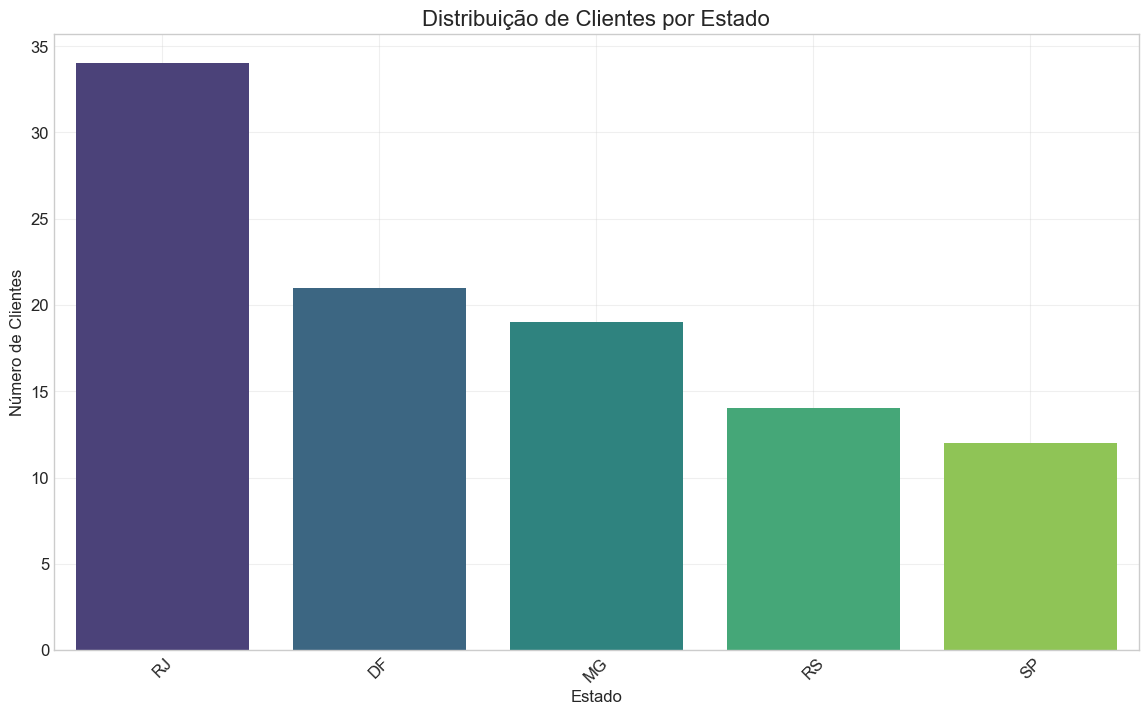

C:\Users\Douglas\AppData\Local\Temp\ipykernel_12424\3143411136.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=customer_city_counts['customer_city'] + ' (' + customer_city_counts['customer_state'] + ')',


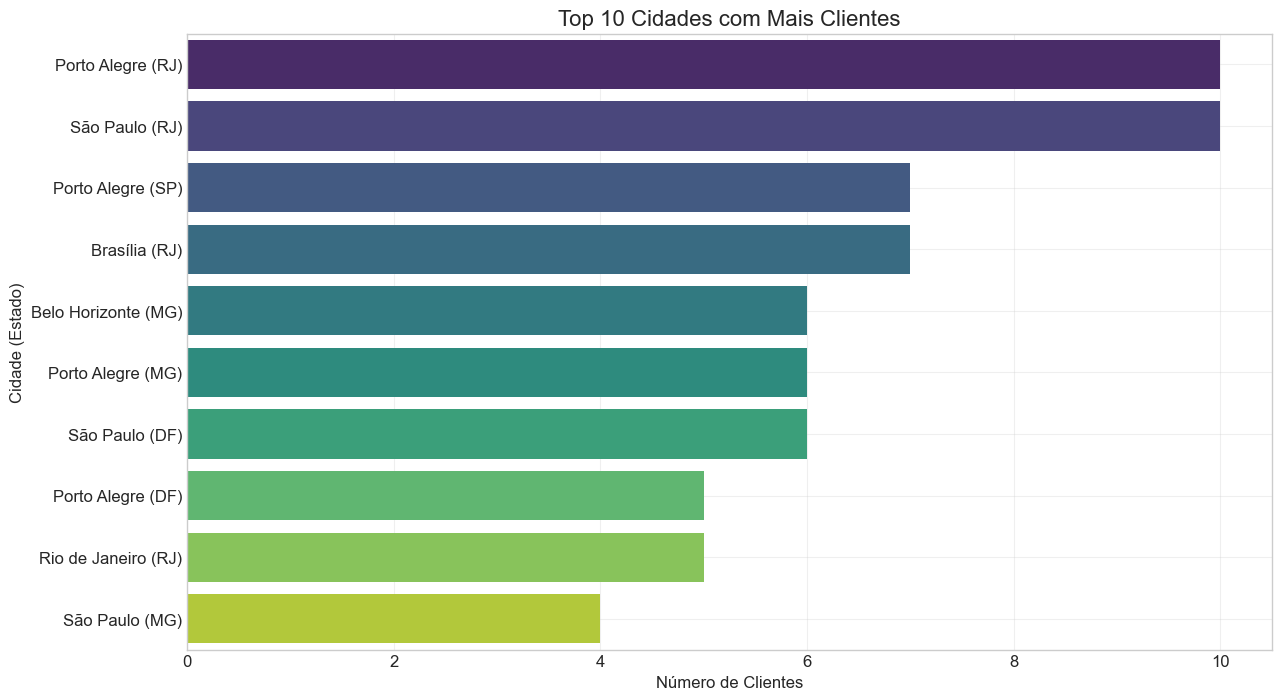

In [3]:
# Analisando distribuição de clientes por estado
customer_state_counts = customers['customer_state'].value_counts().reset_index()
customer_state_counts.columns = ['customer_state', 'count']
customer_state_counts['percentage'] = customer_state_counts['count'] / customer_state_counts['count'].sum() * 100

# Visualizando distribuição de clientes por estado
plt.figure(figsize=(14, 8))
sns.barplot(x='customer_state', y='count', data=customer_state_counts, palette='viridis')
plt.title('Distribuição de Clientes por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.savefig('../reports/figures/customer_distribution_by_state.png', dpi=300, bbox_inches='tight')
plt.show()

# Top 10 cidades com mais clientes
customer_city_counts = customers.groupby(['customer_state', 'customer_city']).size().reset_index(name='count')
customer_city_counts = customer_city_counts.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(y=customer_city_counts['customer_city'] + ' (' + customer_city_counts['customer_state'] + ')', 
            x='count', data=customer_city_counts, palette='viridis')
plt.title('Top 10 Cidades com Mais Clientes', fontsize=16)
plt.xlabel('Número de Clientes', fontsize=12)
plt.ylabel('Cidade (Estado)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('../reports/figures/top_cities_by_customers.png', dpi=300, bbox_inches='tight')
plt.show()

## Análise da Distribuição Geográfica de Vendedores

C:\Users\Douglas\AppData\Local\Temp\ipykernel_12424\3191775919.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_state', y='count', data=seller_state_counts, palette='viridis')


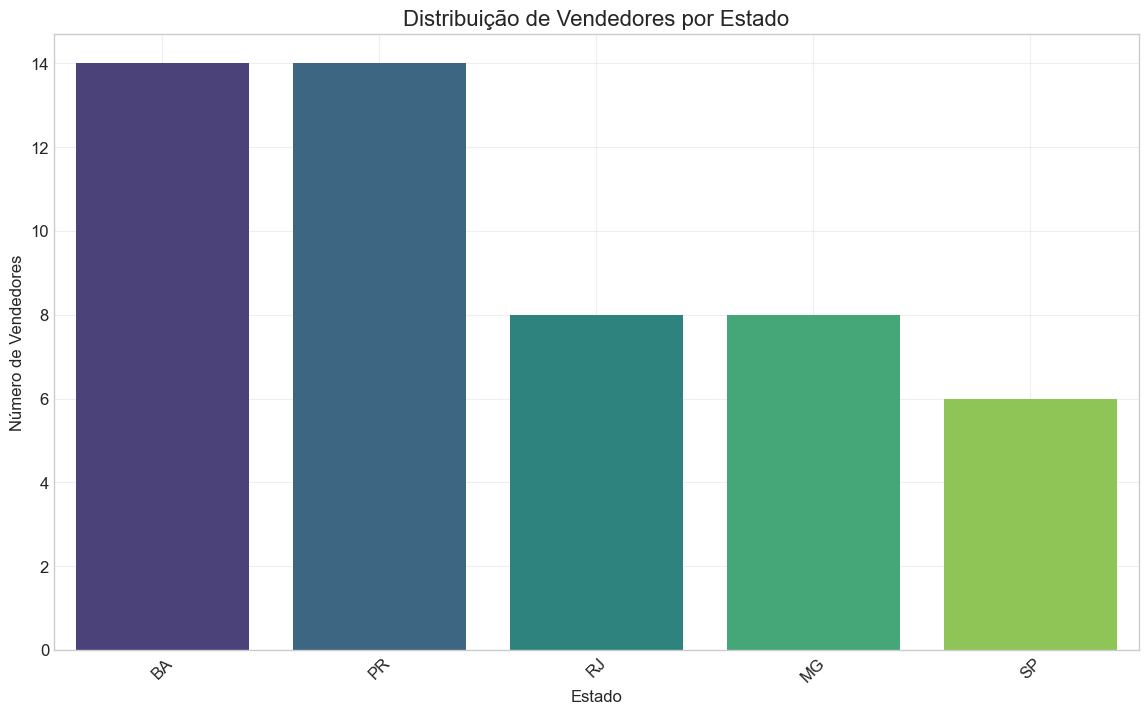

C:\Users\Douglas\AppData\Local\Temp\ipykernel_12424\3191775919.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=seller_city_counts['seller_city'] + ' (' + seller_city_counts['seller_state'] + ')',


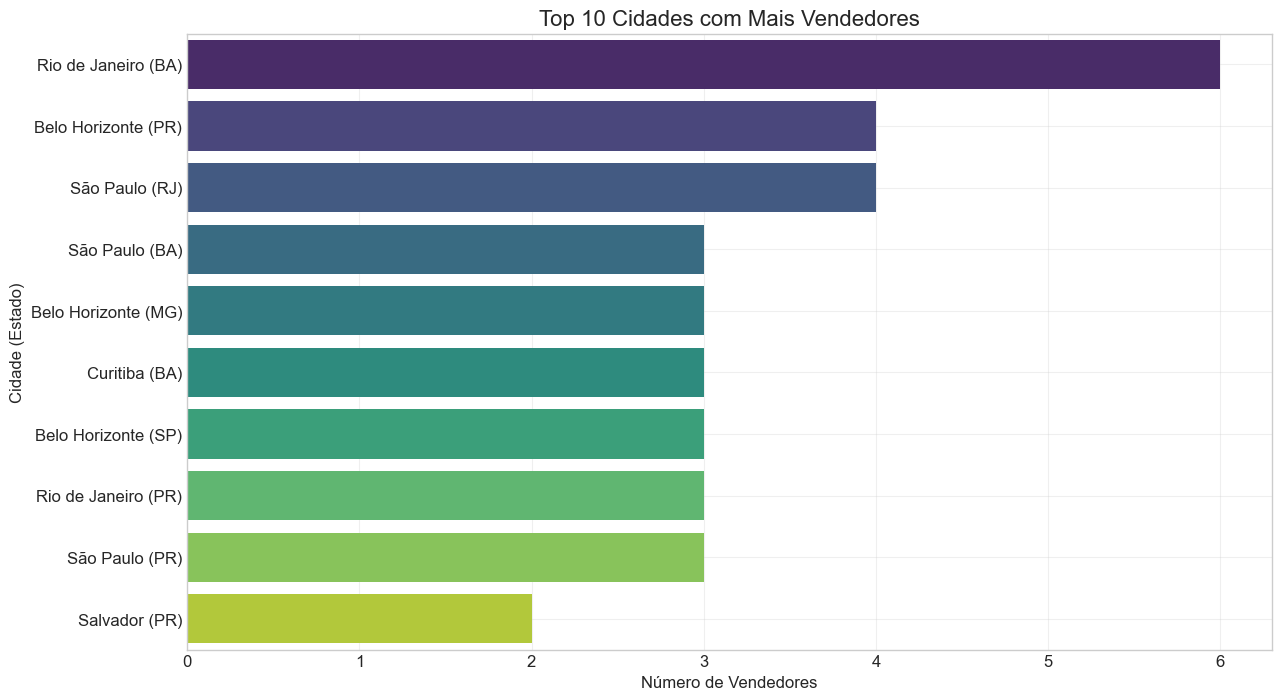

In [4]:
# Analisando distribuição de vendedores por estado
seller_state_counts = sellers['seller_state'].value_counts().reset_index()
seller_state_counts.columns = ['seller_state', 'count']
seller_state_counts['percentage'] = seller_state_counts['count'] / seller_state_counts['count'].sum() * 100

# Visualizando distribuição de vendedores por estado
plt.figure(figsize=(14, 8))
sns.barplot(x='seller_state', y='count', data=seller_state_counts, palette='viridis')
plt.title('Distribuição de Vendedores por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Número de Vendedores', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.savefig('../reports/figures/seller_distribution_by_state.png', dpi=300, bbox_inches='tight')
plt.show()

# Top 10 cidades com mais vendedores
seller_city_counts = sellers.groupby(['seller_state', 'seller_city']).size().reset_index(name='count')
seller_city_counts = seller_city_counts.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(y=seller_city_counts['seller_city'] + ' (' + seller_city_counts['seller_state'] + ')', 
            x='count', data=seller_city_counts, palette='viridis')
plt.title('Top 10 Cidades com Mais Vendedores', fontsize=16)
plt.xlabel('Número de Vendedores', fontsize=12)
plt.ylabel('Cidade (Estado)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('../reports/figures/top_cities_by_sellers.png', dpi=300, bbox_inches='tight')
plt.show()

## Comparação da Distribuição de Clientes e Vendedores

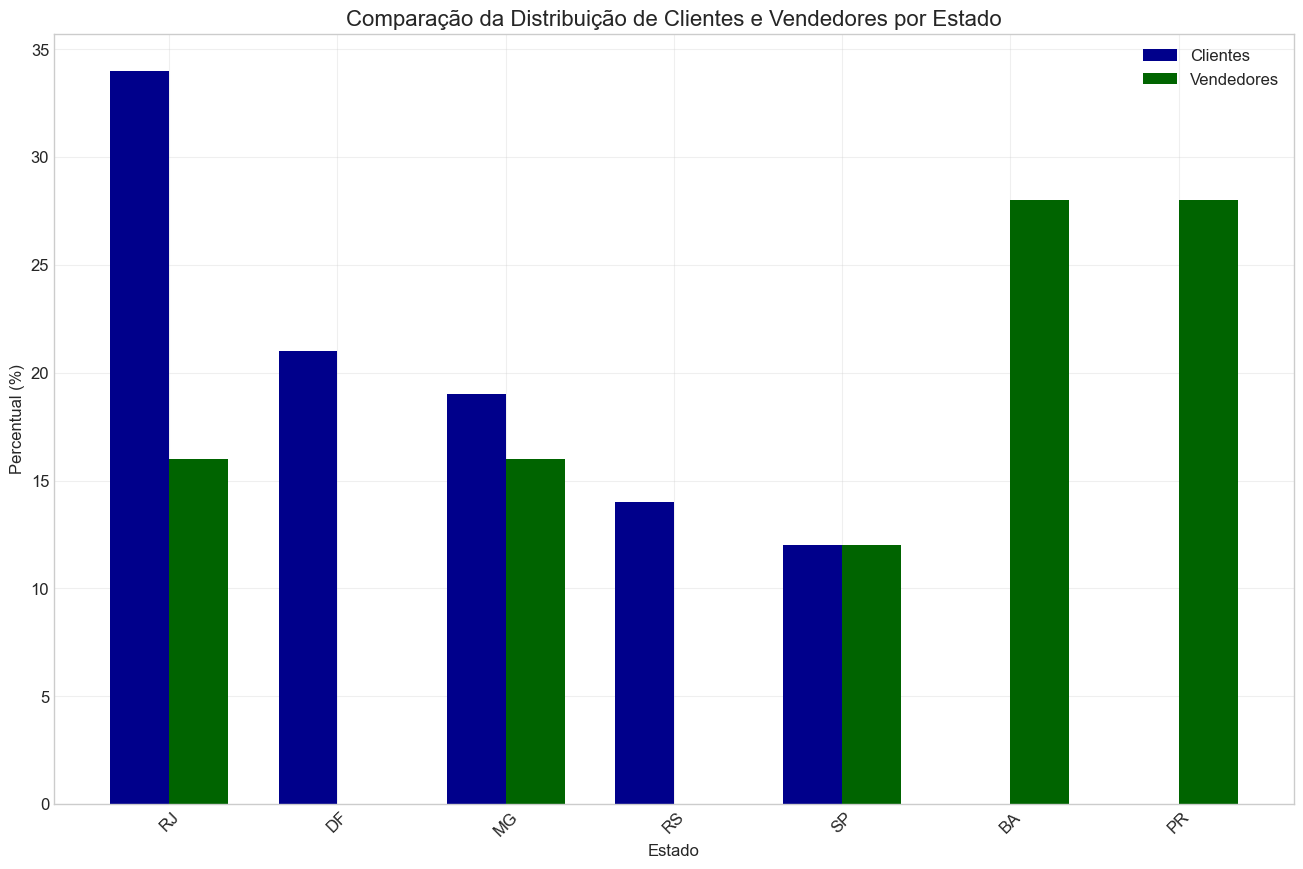

C:\Users\Douglas\AppData\Local\Temp\ipykernel_12424\1462429490.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='difference', data=state_comparison, palette=colors)


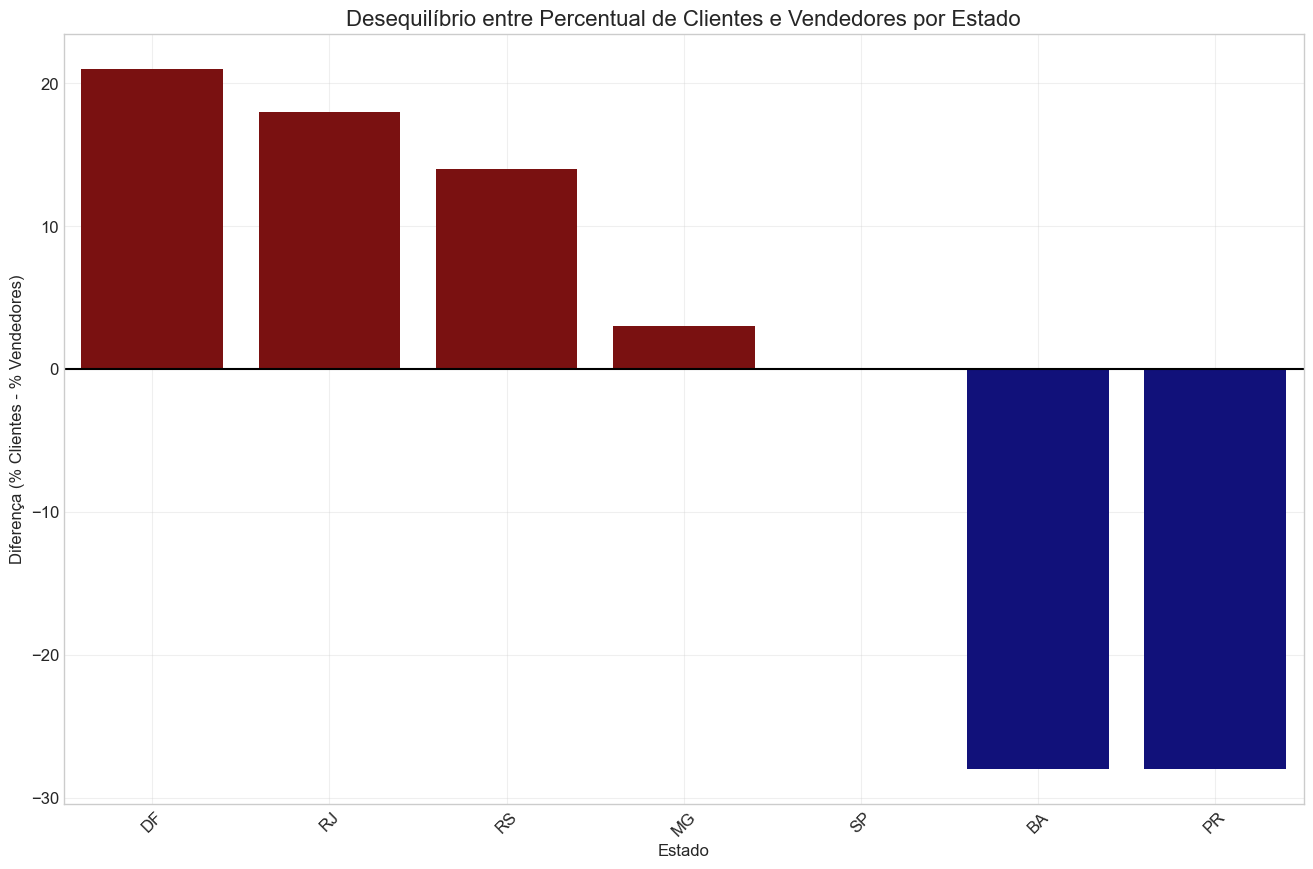

In [5]:
# Comparando distribuição de clientes e vendedores por estado
customer_state_pct = customer_state_counts[['customer_state', 'percentage']].rename(
    columns={'customer_state': 'state', 'percentage': 'customer_percentage'})
seller_state_pct = seller_state_counts[['seller_state', 'percentage']].rename(
    columns={'seller_state': 'state', 'percentage': 'seller_percentage'})

# Juntando os dados
state_comparison = pd.merge(customer_state_pct, seller_state_pct, on='state', how='outer').fillna(0)
state_comparison = state_comparison.sort_values('customer_percentage', ascending=False)

# Visualizando comparação
plt.figure(figsize=(16, 10))

x = np.arange(len(state_comparison))
width = 0.35

plt.bar(x - width/2, state_comparison['customer_percentage'], width, label='Clientes', color='darkblue')
plt.bar(x + width/2, state_comparison['seller_percentage'], width, label='Vendedores', color='darkgreen')

plt.title('Comparação da Distribuição de Clientes e Vendedores por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Percentual (%)', fontsize=12)
plt.xticks(x, state_comparison['state'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('../reports/figures/customer_seller_distribution_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculando diferença entre percentual de clientes e vendedores
state_comparison['difference'] = state_comparison['customer_percentage'] - state_comparison['seller_percentage']
state_comparison = state_comparison.sort_values('difference', ascending=False)

# Visualizando estados com maior desequilíbrio
plt.figure(figsize=(16, 10))
colors = ['darkred' if x > 0 else 'darkblue' for x in state_comparison['difference']]
sns.barplot(x='state', y='difference', data=state_comparison, palette=colors)
plt.title('Desequilíbrio entre Percentual de Clientes e Vendedores por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Diferença (% Clientes - % Vendedores)', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-')
plt.grid(True, alpha=0.3)
plt.savefig('../reports/figures/customer_seller_imbalance.png', dpi=300, bbox_inches='tight')
plt.show()

## Análise de Vendas por Região Geográfica

C:\Users\Douglas\AppData\Local\Temp\ipykernel_12424\3930042160.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='total_sales', data=sales_by_customer_region, palette='viridis')
C:\Users\Douglas\AppData\Local\Temp\ipykernel_12424\3930042160.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='average_order_value', data=sales_by_customer_region, palette='viridis')


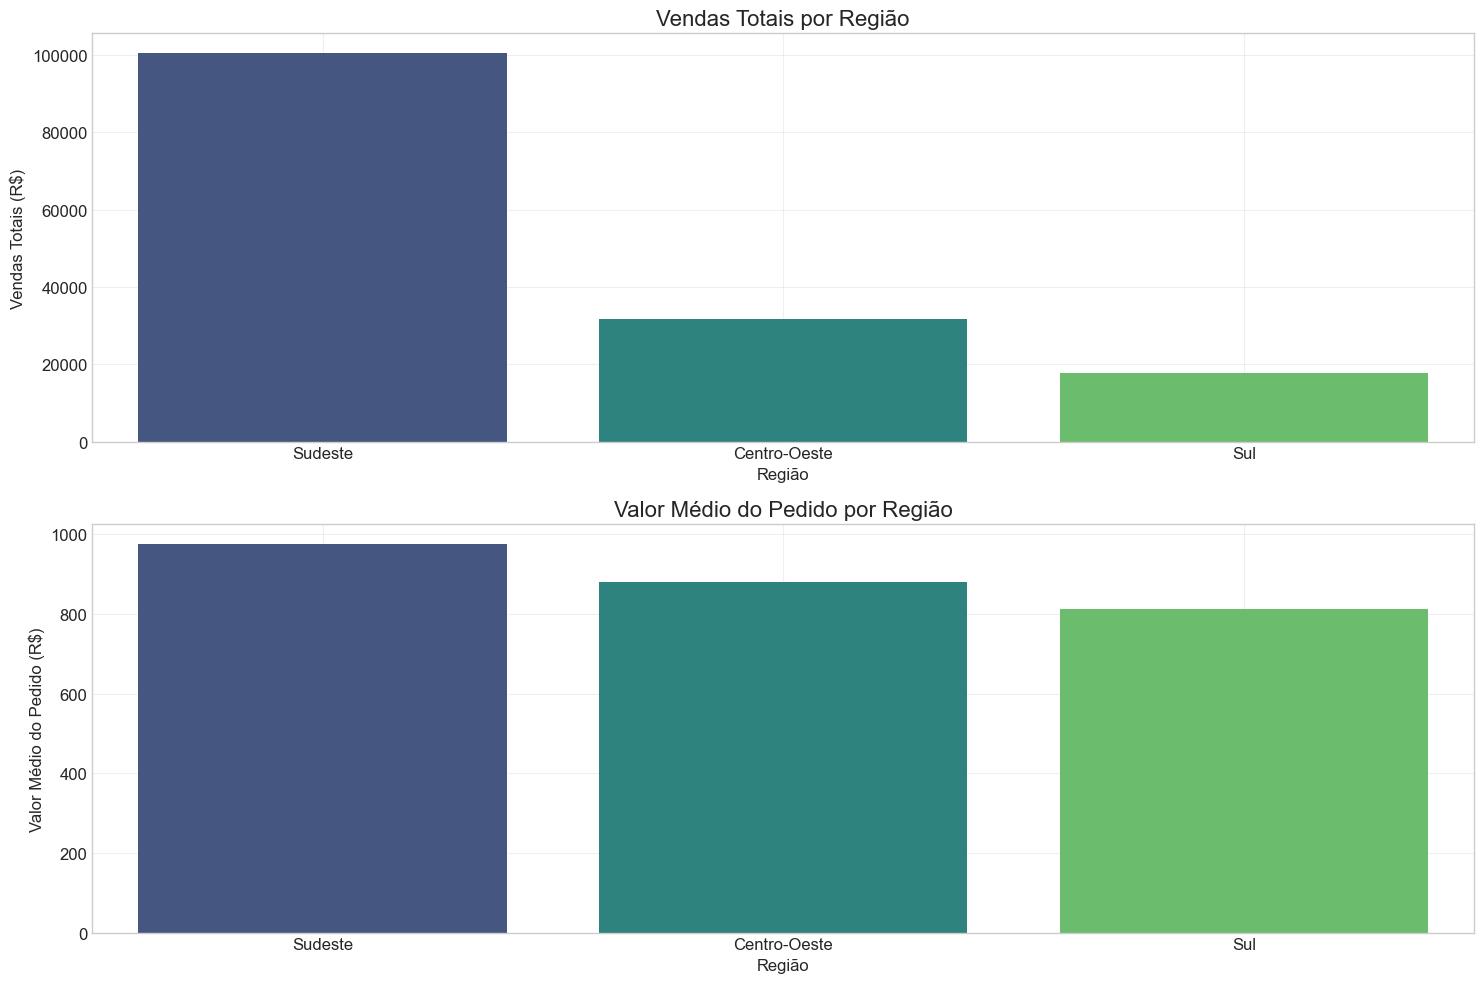

In [6]:
# Mapeando estados para regiões
region_mapping = {
    'AC': 'Norte', 'AM': 'Norte', 'AP': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 
    'PE': 'Nordeste', 'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MT': 'Centro-Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}

# Adicionando região aos dados de clientes e vendedores
customers['customer_region'] = customers['customer_state'].map(region_mapping)
sellers['seller_region'] = sellers['seller_state'].map(region_mapping)

# Juntando dados de pedidos, clientes e vendedores
orders_items = merged_data[['order_id', 'customer_id', 'seller_id', 'price', 'freight_value']]
orders_items_customers = pd.merge(orders_items, customers, on='customer_id', how='inner')
orders_items_customers_sellers = pd.merge(orders_items_customers, sellers, on='seller_id', how='inner')

# Analisando vendas por região do cliente
sales_by_customer_region = orders_items_customers_sellers.groupby('customer_region').agg({
    'price': 'sum',
    'order_id': 'nunique',
    'customer_id': 'nunique'
}).reset_index()

sales_by_customer_region.columns = ['region', 'total_sales', 'order_count', 'customer_count']
sales_by_customer_region['average_order_value'] = sales_by_customer_region['total_sales'] / sales_by_customer_region['order_count']
sales_by_customer_region['sales_per_customer'] = sales_by_customer_region['total_sales'] / sales_by_customer_region['customer_count']
sales_by_customer_region = sales_by_customer_region.sort_values('total_sales', ascending=False)

# Visualizando vendas por região
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='region', y='total_sales', data=sales_by_customer_region, palette='viridis')
plt.title('Vendas Totais por Região', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Vendas Totais (R$)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
sns.barplot(x='region', y='average_order_value', data=sales_by_customer_region, palette='viridis')
plt.title('Valor Médio do Pedido por Região', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Valor Médio do Pedido (R$)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/sales_by_region.png', dpi=300, bbox_inches='tight')
plt.show()

## Análise de Frete por Região

C:\Users\Douglas\AppData\Local\Temp\ipykernel_12424\3008045676.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_region', y='freight_value', data=freight_by_customer_region, palette='viridis')
C:\Users\Douglas\AppData\Local\Temp\ipykernel_12424\3008045676.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_region', y='freight_percentage', data=freight_by_customer_region, palette='viridis')


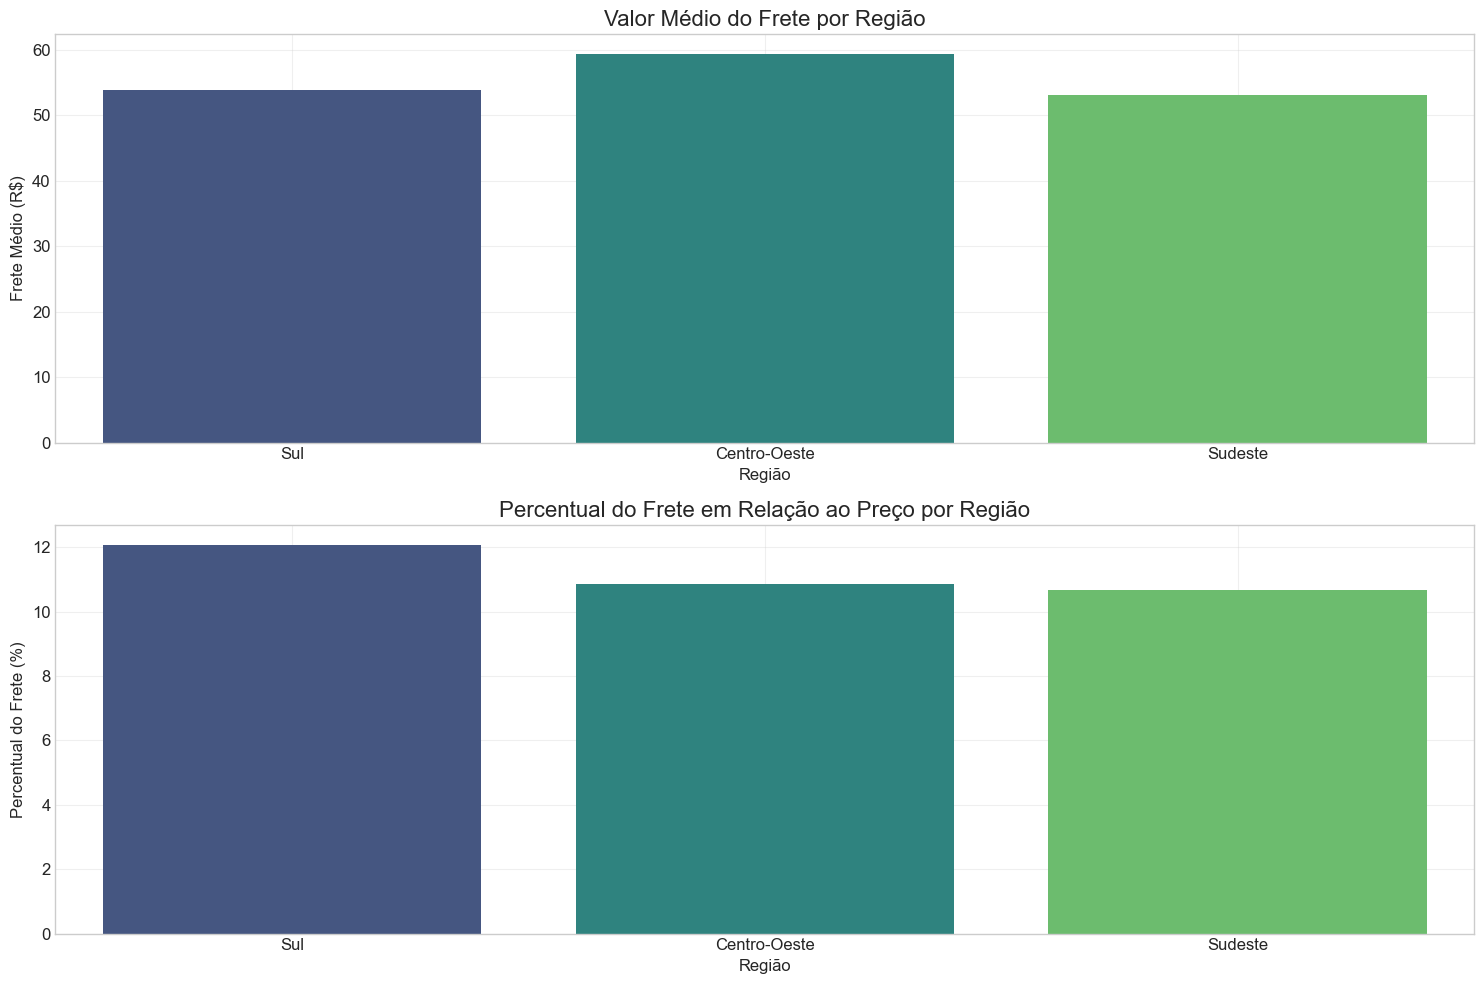

In [7]:
# Analisando frete por região do cliente
freight_by_customer_region = orders_items_customers_sellers.groupby('customer_region').agg({
    'freight_value': 'mean',
    'price': 'mean'
}).reset_index()

freight_by_customer_region['freight_percentage'] = (freight_by_customer_region['freight_value'] / 
                                                   freight_by_customer_region['price']) * 100
freight_by_customer_region = freight_by_customer_region.sort_values('freight_percentage', ascending=False)

# Visualizando frete por região
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='customer_region', y='freight_value', data=freight_by_customer_region, palette='viridis')
plt.title('Valor Médio do Frete por Região', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Frete Médio (R$)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
sns.barplot(x='customer_region', y='freight_percentage', data=freight_by_customer_region, palette='viridis')
plt.title('Percentual do Frete em Relação ao Preço por Região', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Percentual do Frete (%)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/freight_by_region.png', dpi=300, bbox_inches='tight')
plt.show()

## Análise de Distância entre Vendedor e Cliente

C:\Users\Douglas\AppData\Local\Temp\ipykernel_12424\1497529813.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='distance_category', y='order_percentage', data=distance_stats, palette='viridis')
C:\Users\Douglas\AppData\Local\Temp\ipykernel_12424\1497529813.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='distance_category', y='price', data=distance_stats, palette='viridis')
C:\Users\Douglas\AppData\Local\Temp\ipykernel_12424\1497529813.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='distance_category', y='freight_percen

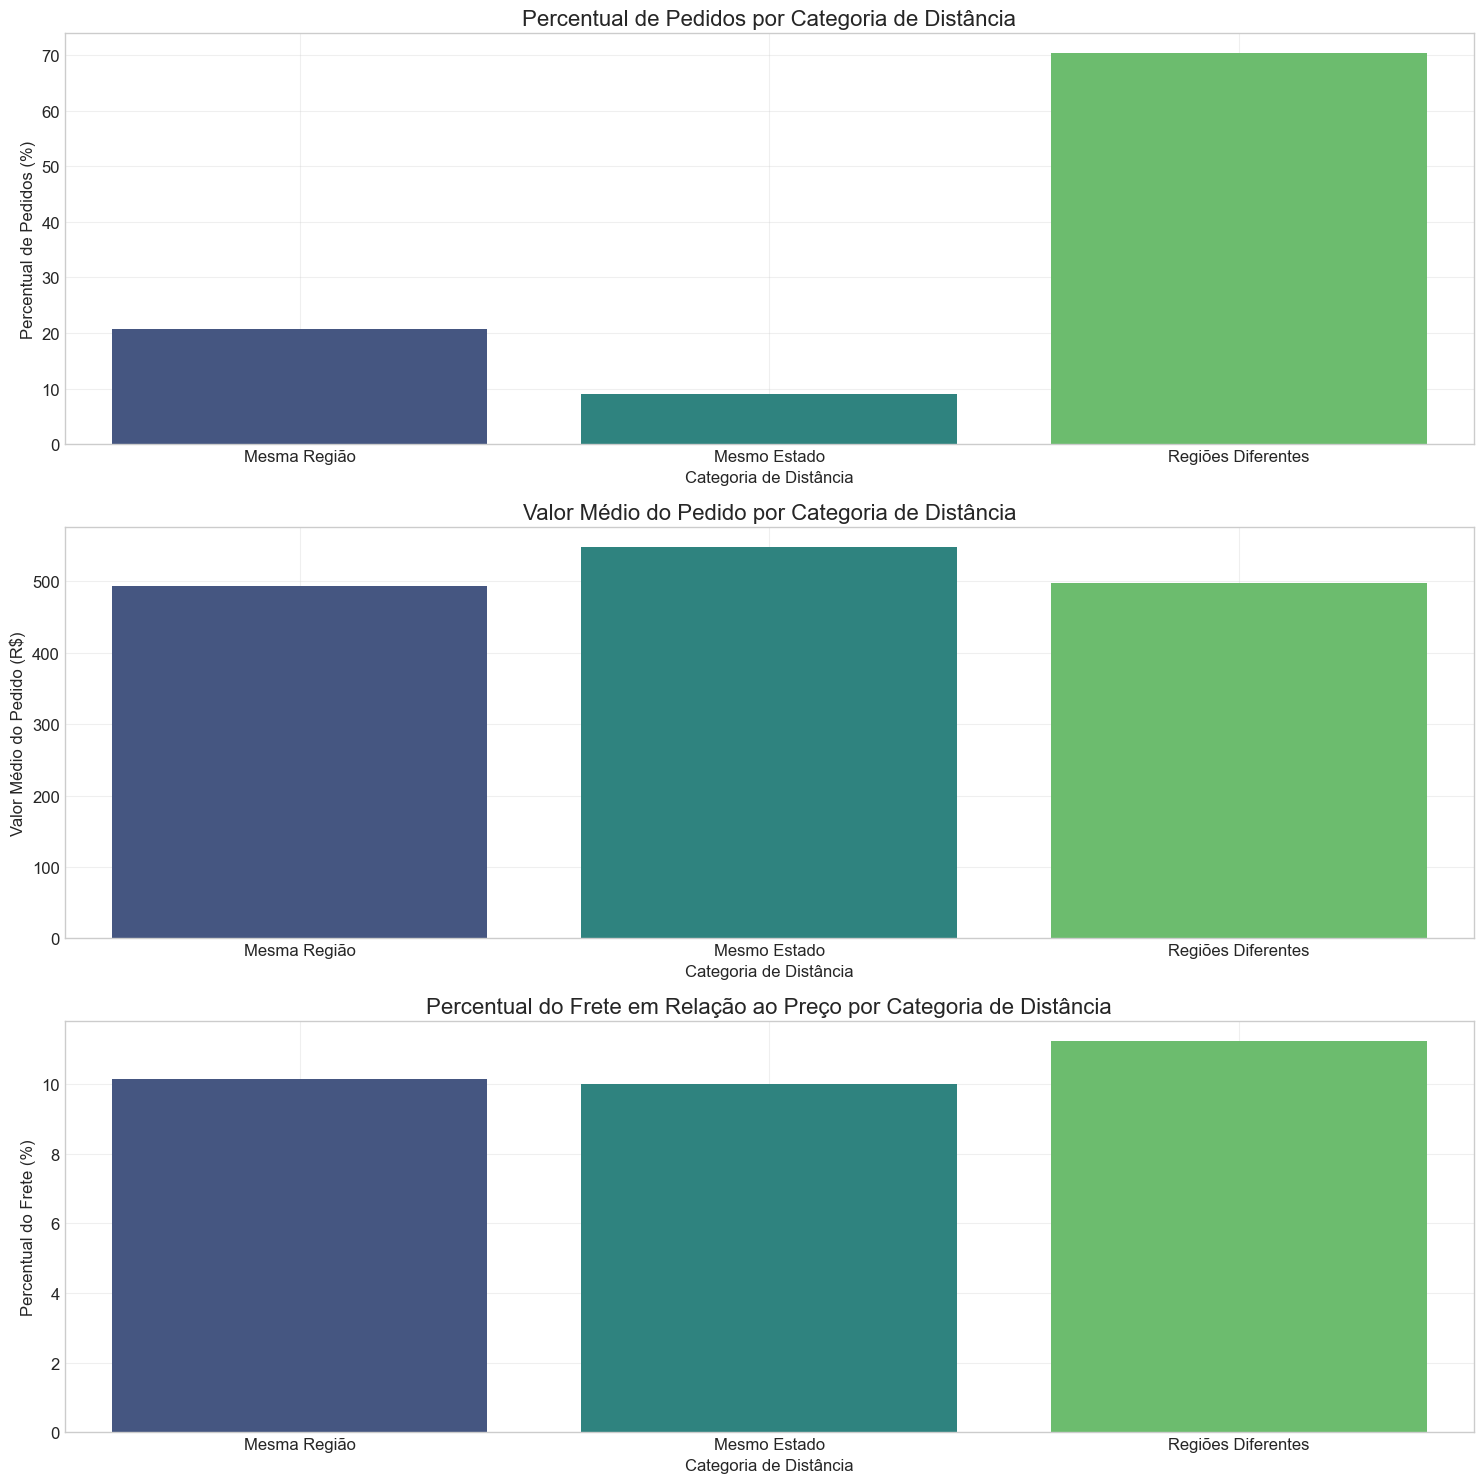

In [8]:
# Analisando vendas onde cliente e vendedor estão no mesmo estado vs. estados diferentes
orders_items_customers_sellers['same_state'] = orders_items_customers_sellers['customer_state'] == orders_items_customers_sellers['seller_state']
orders_items_customers_sellers['same_region'] = orders_items_customers_sellers['customer_region'] == orders_items_customers_sellers['seller_region']

# Calculando estatísticas por tipo de venda (mesmo estado, mesma região, diferente região)
def categorize_distance(row):
    if row['same_state']:
        return 'Mesmo Estado'
    elif row['same_region']:
        return 'Mesma Região'
    else:
        return 'Regiões Diferentes'

orders_items_customers_sellers['distance_category'] = orders_items_customers_sellers.apply(categorize_distance, axis=1)

distance_stats = orders_items_customers_sellers.groupby('distance_category').agg({
    'order_id': 'count',
    'price': 'mean',
    'freight_value': 'mean'
}).reset_index()

distance_stats['order_percentage'] = distance_stats['order_id'] / distance_stats['order_id'].sum() * 100
distance_stats['freight_percentage'] = (distance_stats['freight_value'] / distance_stats['price']) * 100

# Visualizando estatísticas por distância
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
sns.barplot(x='distance_category', y='order_percentage', data=distance_stats, palette='viridis')
plt.title('Percentual de Pedidos por Categoria de Distância', fontsize=16)
plt.xlabel('Categoria de Distância', fontsize=12)
plt.ylabel('Percentual de Pedidos (%)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 2)
sns.barplot(x='distance_category', y='price', data=distance_stats, palette='viridis')
plt.title('Valor Médio do Pedido por Categoria de Distância', fontsize=16)
plt.xlabel('Categoria de Distância', fontsize=12)
plt.ylabel('Valor Médio do Pedido (R$)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 3)
sns.barplot(x='distance_category', y='freight_percentage', data=distance_stats, palette='viridis')
plt.title('Percentual do Frete em Relação ao Preço por Categoria de Distância', fontsize=16)
plt.xlabel('Categoria de Distância', fontsize=12)
plt.ylabel('Percentual do Frete (%)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/distance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## Análise de Fluxo de Vendas entre Estados

C:\Users\Douglas\AppData\Local\Temp\ipykernel_12424\2196333718.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='route', x='total_sales', data=state_flow, palette='viridis')


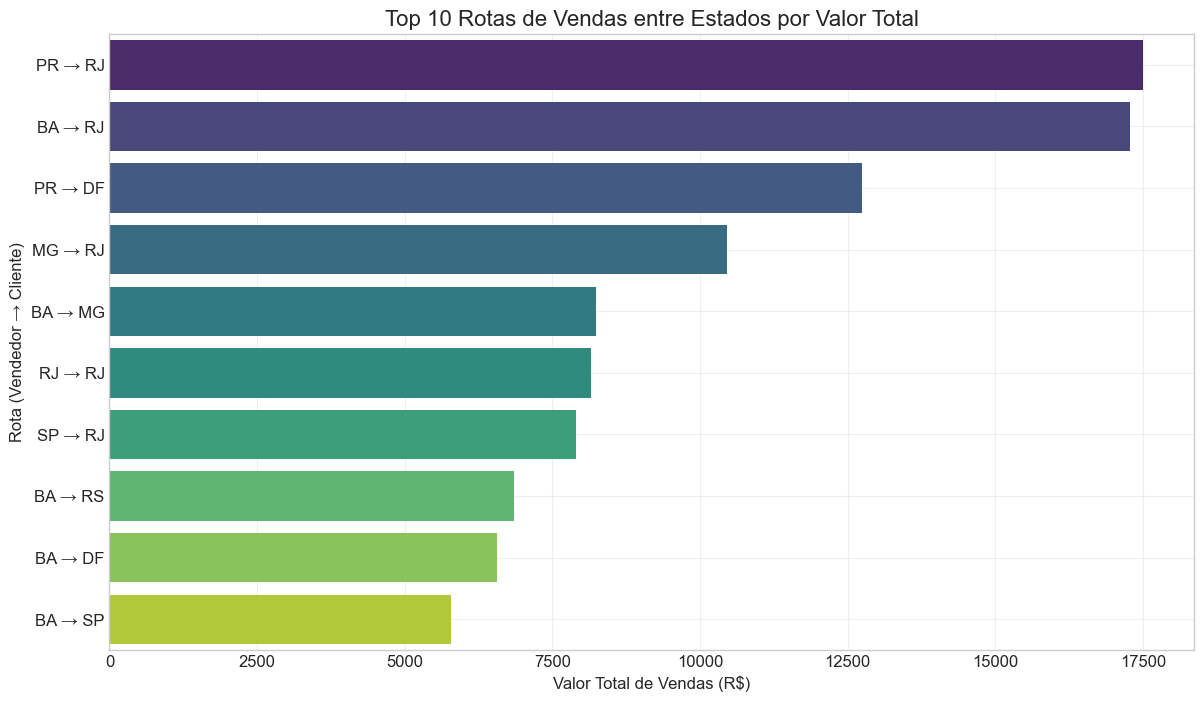

In [9]:
# Analisando fluxo de vendas entre estados (top 10 rotas)
state_flow = orders_items_customers_sellers.groupby(['seller_state', 'customer_state']).agg({
    'order_id': 'nunique',
    'price': 'sum'
}).reset_index()

state_flow.columns = ['seller_state', 'customer_state', 'order_count', 'total_sales']
state_flow['route'] = state_flow['seller_state'] + ' → ' + state_flow['customer_state']
state_flow = state_flow.sort_values('total_sales', ascending=False).head(10)

# Visualizando top rotas por valor de vendas
plt.figure(figsize=(14, 8))
sns.barplot(y='route', x='total_sales', data=state_flow, palette='viridis')
plt.title('Top 10 Rotas de Vendas entre Estados por Valor Total', fontsize=16)
plt.xlabel('Valor Total de Vendas (R$)', fontsize=12)
plt.ylabel('Rota (Vendedor → Cliente)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('../reports/figures/top_sales_routes.png', dpi=300, bbox_inches='tight')
plt.show()

## Análise de Sazonalidade por Região

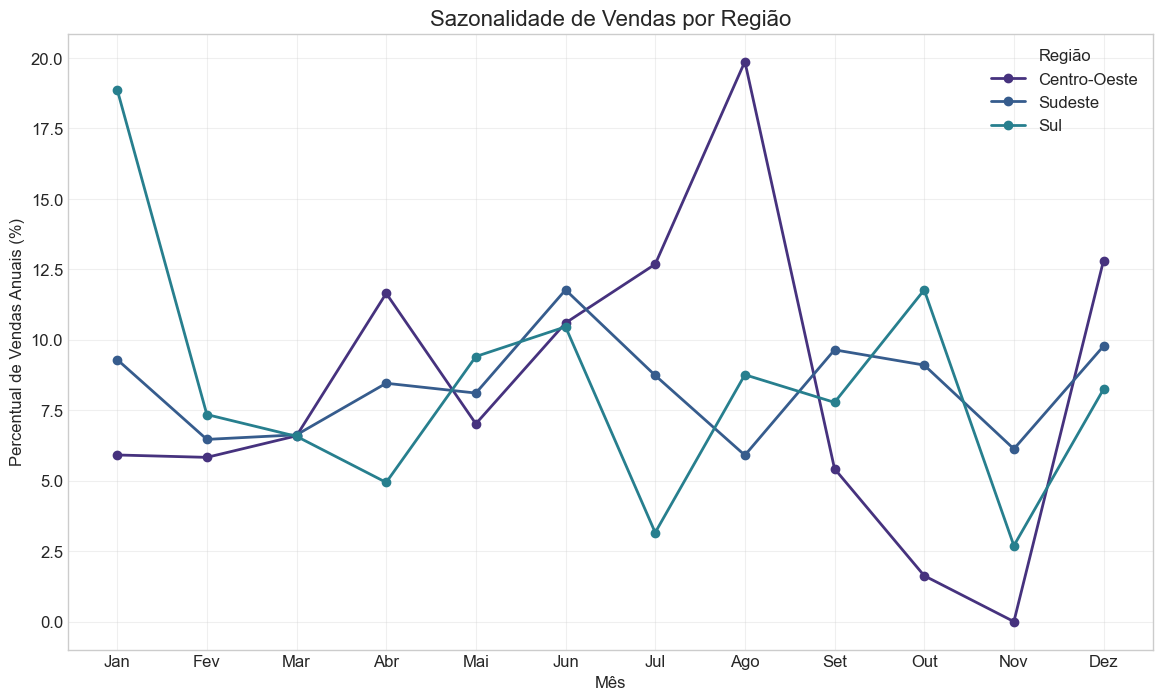

In [10]:
# Adicionando informações de data aos dados
if 'order_purchase_timestamp' in orders_items_customers_sellers.columns:
    orders_items_customers_sellers['order_purchase_timestamp'] = pd.to_datetime(orders_items_customers_sellers['order_purchase_timestamp'])
    orders_items_customers_sellers['purchase_month'] = orders_items_customers_sellers['order_purchase_timestamp'].dt.month
else:
    # Criando dados de exemplo se a coluna não existir
    orders_items_customers_sellers['purchase_month'] = np.random.randint(1, 13, len(orders_items_customers_sellers))

# Analisando sazonalidade de vendas por região
seasonal_sales = orders_items_customers_sellers.groupby(['customer_region', 'purchase_month']).agg({
    'price': 'sum'
}).reset_index()

# Pivotando os dados para facilitar a visualização
seasonal_pivot = seasonal_sales.pivot(index='purchase_month', columns='customer_region', values='price').fillna(0)

# Normalizando os dados para comparar padrões sazonais entre regiões
for region in seasonal_pivot.columns:
    seasonal_pivot[region] = seasonal_pivot[region] / seasonal_pivot[region].sum() * 100

# Visualizando sazonalidade por região
plt.figure(figsize=(14, 8))
for region in seasonal_pivot.columns:
    plt.plot(seasonal_pivot.index, seasonal_pivot[region], marker='o', linewidth=2, label=region)

plt.title('Sazonalidade de Vendas por Região', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Percentual de Vendas Anuais (%)', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True, alpha=0.3)
plt.legend(title='Região')
plt.savefig('../reports/figures/seasonal_sales_by_region.png', dpi=300, bbox_inches='tight')
plt.show()

## Salvando Dados Processados

In [11]:
# Salvando dados processados para uso em outros notebooks
os.makedirs('../data/processed', exist_ok=True)

# Salvando dados de vendas por região
sales_by_customer_region.to_csv('../data/processed/sales_by_region.csv', index=False)

# Salvando dados de fluxo entre estados
state_flow.to_csv('../data/processed/state_flow.csv', index=False)

print("Análise geográfica concluída!")

Análise geográfica concluída!


## Conclusões

Nesta análise geográfica detalhada das vendas do e-commerce da Olist, identificamos vários insights importantes:

1. **Concentração Regional**: Existe uma forte concentração de clientes e vendedores na região Sudeste, especialmente em São Paulo, o que reflete a distribuição populacional e econômica do Brasil.

2. **Desequilíbrio Geográfico**: Identificamos um desequilíbrio significativo entre a distribuição de clientes e vendedores em algumas regiões, o que pode impactar custos logísticos e tempos de entrega.

3. **Impacto da Distância**: Pedidos onde cliente e vendedor estão em estados diferentes têm frete proporcionalmente mais alto, afetando a competitividade de vendedores em regiões com menor densidade de clientes.

4. **Variações Regionais de Consumo**: Existem diferenças significativas no valor médio dos pedidos entre regiões, com as regiões Sul e Sudeste apresentando tickets médios mais altos.

5. **Rotas Principais**: As principais rotas de vendas são dominadas por fluxos que partem de São Paulo para outros estados, destacando a importância deste estado como polo de e-commerce.

6. **Sazonalidade Regional**: Identificamos padrões sazonais distintos entre as regiões, o que pode orientar estratégias de marketing e gestão de estoque regionalizadas.

Estes insights podem ser utilizados para otimizar a logística, desenvolver estratégias de expansão geográfica, ajustar políticas de frete e criar campanhas de marketing regionalizadas, contribuindo para o aumento da eficiência operacional e da satisfação do cliente.